In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [38]:
df=pd.read_csv('Boston.csv')
df.head()
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [40]:
x=sm.add_constant(df['lstat'])
y=df['medv']
model=sm.OLS(y,x)
estimate=model.fit()
# print(estimate.summary())
pred, lwr, upr=wls_prediction_std(estimate)
predictions=estimate.get_prediction(x)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.822595,0.405814,29.025299,30.619891,17.584603,42.060587
1,25.870390,0.308011,25.265246,26.475534,13.643413,38.097367
2,30.725142,0.433488,29.873477,31.576807,18.483488,42.966796
3,31.760696,0.466794,30.843594,32.677798,19.514315,44.007076
4,29.490078,0.395994,28.712077,30.268079,17.253328,41.726828
...,...,...,...,...,...,...
501,25.366864,0.299509,24.778424,25.955303,13.140702,37.593025
502,25.927393,0.309045,25.320218,26.534568,13.700315,38.154470
503,29.195563,0.387483,28.434281,29.956844,16.959864,41.431261
504,28.397521,0.365412,27.679603,29.115439,16.164444,40.630598


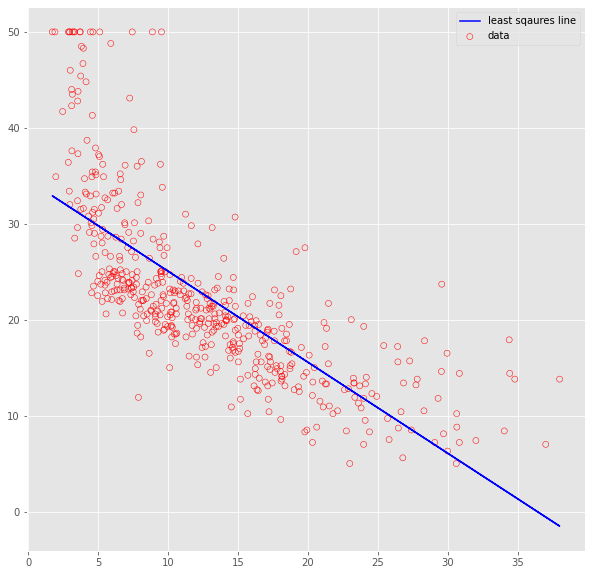

In [62]:
fig,axis=plt.subplots(figsize=(10,10))
axis.scatter(df['lstat'],y,facecolors='none',edgecolors='red', label='data')
axis.plot(df['lstat'],estimate.fittedvalues,color='blue',label='least sqaures line')
axis.legend()

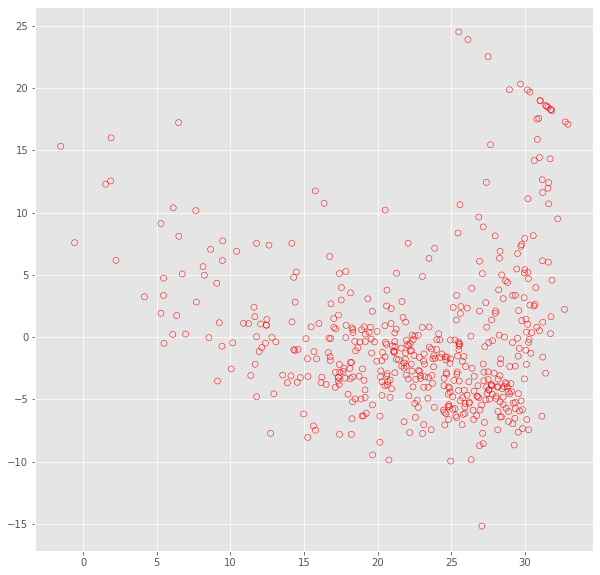

In [80]:
# diagnostic plots
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(estimate.fittedvalues,estimate.resid.values,facecolors='none',edgecolors='red')
